#### 1. Cargar el dataset limpio

In [15]:
import pandas as pd 

df = pd.read_csv("/home/tomas/analisisPoblacionPib/data/datos_limpios.csv")
df.head()

,country,population,year,gross_domestic_product_(gdp),gross_national_income(gni)_in_usd
0,Afghanistan,10752971,1970,1.731436e+09,1.766528e+09
1,Afghanistan,11015857,1971,1.812838e+09,1.850122e+09
2,Afghanistan,11286753,1972,1.647900e+09,1.683948e+09
3,Afghanistan,11575305,1973,1.702716e+09,1.739998e+09
4,Afghanistan,11869879,1974,2.061729e+09,2.106420e+09


In [16]:
#Renombro las columnas

df = df.rename(columns={'gross_national_income(gni)_in_usd': "gni", "gross_domestic_product_(gdp)": "gdp"})

#### 2. Defino las variables 

In [17]:
print(df.columns)


Index(['country', 'population', 'year', 'gdp', 'gni'], dtype='object')


In [18]:
x = df[["population", "gni"]]
y = df[["gdp"]]

####  3. Dividir en conjunto de entrenamiento y prueba

In [29]:
from sklearn.model_selection import train_test_split

# División 80% entrenamiento, 20% prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### 4. Entrenar un modelo de regresión lineal

In [30]:
from sklearn.linear_model import LinearRegression

# Instanciar el modelo

modelo = LinearRegression()

# Entrenar con los datos de entrenamiento

modelo.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### 5. Predicción del modelo

In [42]:
y_pred = modelo.predict(x_test)

y_pred

array([[2.52940900e+11],
       [3.12232072e+10],
       [6.81713979e+09],
       ...,
       [2.32368967e+09],
       [1.11182218e+12],
       [1.24182924e+09]], shape=(2103, 1))

#### 6. Interpretar los coeficientes del modelo 

In [32]:
# Coeficientes del modelo 

coeficientes = pd.DataFrame({"Variable": x.columns,
                             "Coeficiente": modelo.coef_.ravel()})

# intercepto
intercepto = modelo.intercept_

print(coeficientes)
print(f"Intercepto: {intercepto}")

     Variable  Coeficiente
0  population    43.829473
1         gni     0.989430
Intercepto: [1.15279421e+09]


Por cada unidad adicional de población, el PIB aumenta en promedio 43.83 dólares (depende de la escala de los datos).
Por cada dólar adicional de GNI, el PIB crece 0.989 dólares, lo que indica una relación casi directa.

PIB = 43.83 × Population + 0.989 × GNI + 1.15 × 10^9


 ### Interpretación y Evaluación del Modelo

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("R²:", r2_score(y, y_pred))

MAE: 4335731302.60103
RMSE: 14192665468.922514
R²: 0.9997921979199044


Interpretación de métricas del modelo: 

    El MAE indica que, en promedio, el modelo se equivoca en aproximadamente 4.335 millones de USD al predecir el PIB.

    El RMSE (error cuadrático medio) es de 14.192 millones, lo que penaliza más fuertemente los errores grandes.

    El R² = 0.99979 indica que el 99.98% de la variabilidad del PIB puede explicarse por la población y el GNI, lo que sugiere una excelente capacidad predictiva del modelo.

### Gráfico de PIB real vs PIB predicho

/tmp/ipykernel_70489/2148742784.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  sns.scatterplot(x=y_test.values.ravel(), y=y_pred.ravel())


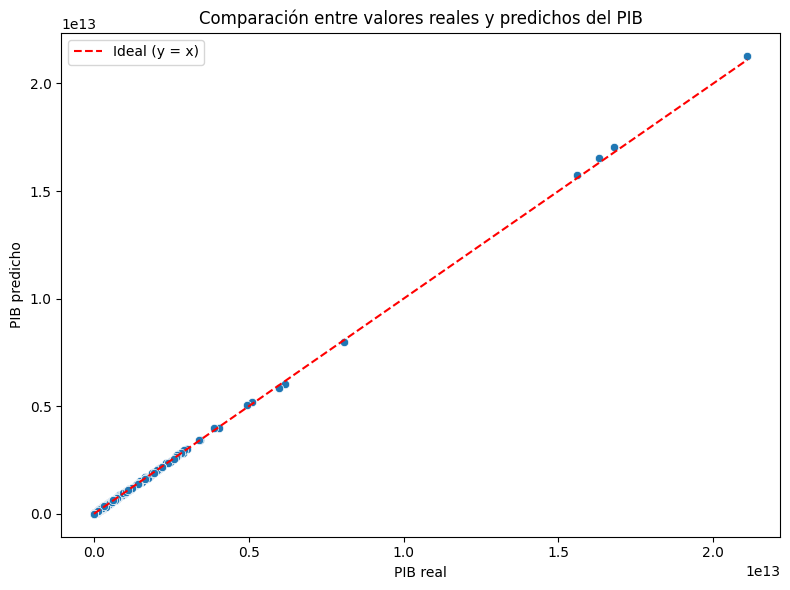

In [48]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=y_test.values.ravel(), y=y_pred.ravel())
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Ideal (y = x)")
plt.xlabel("PIB real")
plt.ylabel("PIB predicho")
plt.title("Comparación entre valores reales y predichos del PIB")
plt.legend()
plt.tight_layout()
plt.show()